In [117]:
import numpy as np
import matplotlib.pyplot as plt
from model import kalman_filter
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
def get_artificial_data(num_step=10000, delta_time = 0.1, hookes_const = 0.01, friction_rate=0.01):

    transition_noise = lambda : np.random.randn(2) * 0.0001
    observation_noise = lambda : np.random.randn(2) * 0.1

    A = np.array([[1, delta_time], [-hookes_const*delta_time, 1-friction_rate*delta_time]])
    C = np.identity(2)
    print("A=", A, "c=", C)

    init_pos = np.array([1., 0.,])
    hidden_data = [init_pos]
    observed_data = [C@init_pos + observation_noise()]

    for n in range(num_step):
        hidden_data.append(A @ hidden_data[-1] + transition_noise())
        observed_data.append(C @ hidden_data[-1] + observation_noise())

    return np.stack(hidden_data), np.stack(observed_data), A, C

In [103]:
hidden_data, observed_data, A, C,  = get_artificial_data()

A= [[ 1.     0.1  ]
 [-0.001  0.999]] c= [[1. 0.]
 [0. 1.]]


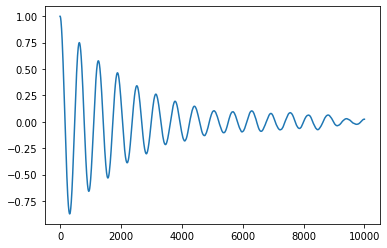

In [104]:
plt.plot(hidden_data[:, 0])

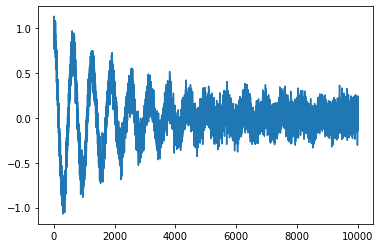

In [108]:
plt.plot(observed_data[:, 0])

In [126]:
kalman = kalman_filter.KalmanFilter(2, A, C, np.identity(2) * 0.0001, np.identity(2)*0.1)
mu, covar, c = kalman.forward(observed_data, np.array([1., 0.]), np.array([[1., 0], [0, 1]]))

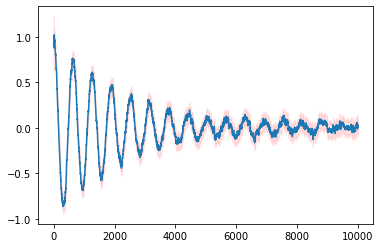

In [138]:
plt.plot(mu[1:, 0])
plt.fill_between(np.arange(len(mu)-1), (mu[1:, 0]-np.sqrt(covar[:, 0, 0])), (mu[1:, 0]+np.sqrt(covar[:, 0, 0])), alpha=.1, color="r")

In [135]:
print(np.sqrt(covar[:, 0, 0]))

[0.30151134 0.21858453 0.18071951 ... 0.08200822 0.08200822 0.08200822]
